<a href="https://colab.research.google.com/github/RaymanPython/LDA_model/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Загрузка данных из файла HR.csv
data = pd.read_csv('HR.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:

statistics = data.describe()
statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# Рассчет медианы
median = data.median()
median

<ipython-input-9-11e7c8765b74>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = data.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [11]:
# Рассчет моды
mode = data.mode().iloc[0]
mode

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Выбор количественных переменных
numeric_vars = data.select_dtypes(include=['float64', 'int64'])

# Рассчитайте корреляционную матрицу
correlation_matrix = numeric_vars.corr()

# Определите две самые скоррелированные и наименее скоррелированные переменные
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
least_correlated = correlation_matrix.unstack().sort_values().drop_duplicates()

In [19]:
# Самые скоррелированные переменные:
most_correlated[:2]

satisfaction_level  satisfaction_level      1.000000
number_project      average_montly_hours    0.417211
dtype: float64

In [20]:
# Наименее скоррелированные переменные:
least_correlated[:2]

left  satisfaction_level   -0.388375
      Work_accident        -0.154622
dtype: float64

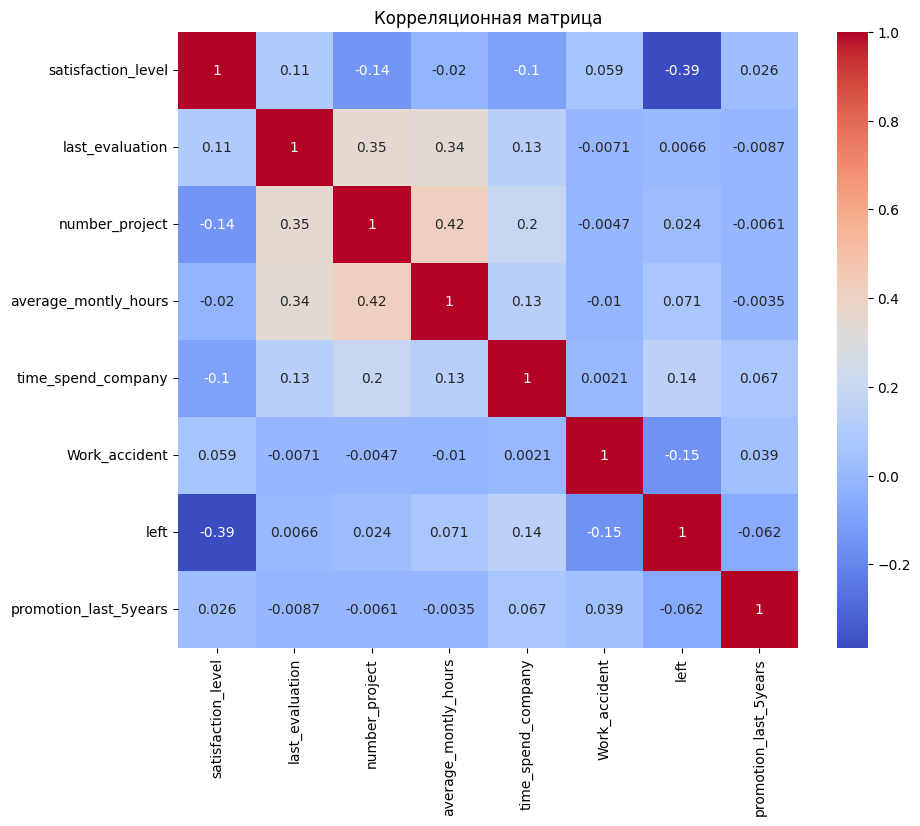

In [21]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Пункт 3


In [23]:
# Рассчитайте количество сотрудников в каждом департаменте
employees_per_department = data['department'].value_counts()
employees_per_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [25]:

# Показать распределение сотрудников по зарплатам
salary_distribution = data["salary"].value_counts()
salary_distribution


low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [26]:

# Показать распределение сотрудников по зарплатам в каждом департаменте
salary_distribution_by_department = data.groupby("department")["salary"].value_counts()
salary_distribution_by_department


department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

In [30]:
import scipy.stats as stats

# Выделение выборок с высоким и низким окладом
employees_high_salary = data[data["salary"] == "high"]["average_montly_hours"]
employees_low_salary = data[data["salary"] == "low"]["average_montly_hours"]

# Проведение t-теста для двух независимых выборок
t_statistic, p_value = stats.ttest_ind(employees_high_salary, employees_low_salary)

# Проверка значимости результатов
alpha = 0.05  # Уровень значимости
p_value >= alpha

True

In [31]:
# Расчет допя сотрудников с повышением за последние 5 лет
promoted_resigned = data[data["left"] == 1]["promotion_last_5years"].sum()
promoted_resigned


19

In [32]:
# Расчет средней степени удовлетворенности сотрудников
satisfaction_resigned = data[data["left"] == 1]["satisfaction_level"].mean()
satisfaction_resigned


0.4400980117614114

In [33]:
# Расчет среднего копичества проектов уволившихся сотрудников
projects_resigned = data[data["left"] == 1]["number_project"].mean()
projects_resigned


3.8555026603192384

In [34]:
# Расчет допя сотрудников без повышения за последние 5 лет
promoted_active = data[data["left"] == 0]["promotion_last_5years"].sum()
promoted_active


300

In [35]:
# Расчет средней степени удовлетворенности активных сотрудников
satisfaction_active = data[data["left"] == 0]["satisfaction_level"].mean()
satisfaction_active



0.666809590479524

In [36]:
# Расчет среднего копичества проектов активных сотрудников
projects_active = data[data["left"] == 0]["number_project"].mean()
projects_active

3.786664333216661

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Определение признаков (features) и целевой переменной (target)
features = data.drop(["left", "department", "salary"], axis=1)
target = data["left"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Прогнозирование классов для тестовой выборки
y_pred = lda.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [39]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7533333333333333

In [40]:
# Оценка полноты модели
recall = recall_score(y_test, y_pred)
recall

0.23512747875354106

In [41]:
# Оценка точности модели
precision = precision_score(y_test, y_pred)
precision

0.453551912568306

In [42]:

# Оценка F1-меры модели
f1 = f1_score(y_test, y_pred)
f1

0.30970149253731344